In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Nhờ việc chuẩn hóa này, các thuật toán như linear regression, logistic regression được cải thiện.

Công thức của nó là: z = (x – u) / s

Trong đó: u là mean của dữ liệu huấn luyện, s là độ lệch chuẩn, x là điểm dữ liệu cần chuẩn hóa, z là dữ liệu được chuẩn hóa

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,40.368906,6.430475,9.249874,-1.918602,18.616377
1,48.907633,1.391487,9.372892,7.727639,20.868245
2,54.594765,1.843043,10.929344,3.756281,23.976009
3,52.434181,0.699006,10.550063,36.499555,25.820577
4,54.747224,3.113589,9.128458,-2.670163,21.664348


<Axes: ylabel='Density'>

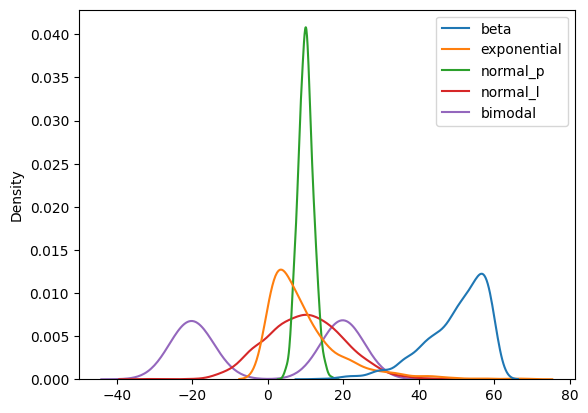

In [5]:
#Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.939111,9.841720,10.065098,9.882318,-0.078886
std,8.380377,10.044640,1.994694,10.219757,20.190760
min,13.720021,0.043549,4.190790,-31.622216,-28.875860
25%,45.246733,2.948444,8.689127,2.721459,-20.203193
50%,52.033812,6.994636,10.025738,9.831735,-0.261547
75%,56.668575,13.281497,11.323767,16.740638,20.006973
max,59.988812,67.829682,17.199101,44.217237,28.138397


<Axes: ylabel='Density'>

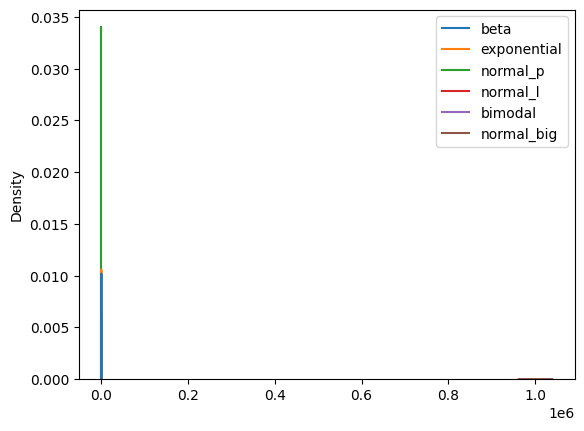

In [7]:
#Thêm một đặc trưng với giá trị lớn hơn nhiều

normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

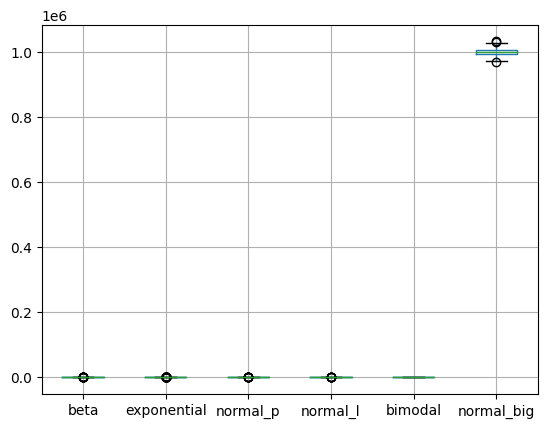

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

Chuẩn hóa với StandardScaler (Z-Score scaling)

In [9]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.142549,-0.339778,-0.408901,-1.155294,0.926395,0.334540
1,-0.123144,-0.841689,-0.347197,-0.210940,1.037980,-0.242177
2,0.555820,-0.796712,0.433489,-0.599731,1.191978,-0.187527
3,0.297877,-0.910664,0.243250,2.605792,1.283380,0.758340
4,0.574022,-0.670158,-0.469800,-1.228871,1.077429,0.536156


<Axes: ylabel='Density'>

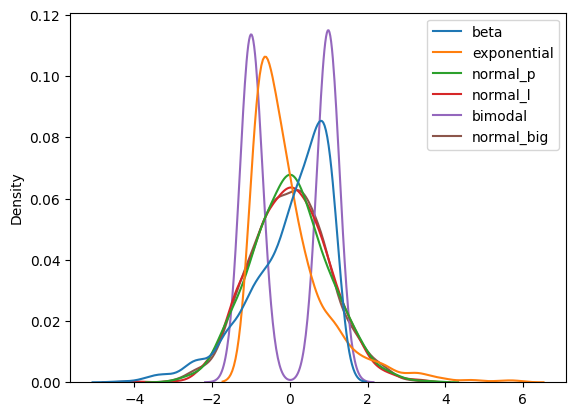

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.740830e-16,5.329071e-17,-1.731948e-16,-7.815970e-17,1.136868e-16,9.681145e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.324055e+00,-9.759508e-01,-2.946440e+00,-4.063238e+00,-1.426959e+00,-3.001405e+00
25%,-5.602046e-01,-6.866076e-01,-6.901604e-01,-7.010385e-01,-9.972075e-01,-6.939331e-01
50%,2.500781e-01,-2.835850e-01,-1.974231e-02,-4.952073e-03,-9.051274e-03,1.223624e-02
75%,8.034043e-01,3.426204e-01,6.313245e-01,6.714203e-01,9.953023e-01,6.714932e-01
max,1.199794e+00,5.775914e+00,3.578280e+00,3.361342e+00,1.398234e+00,3.172384e+00


<Axes: >

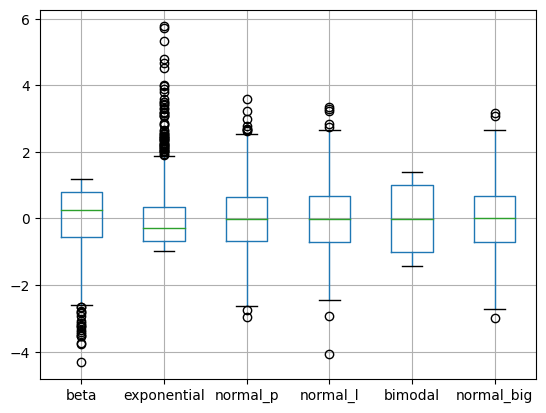

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

Chúng ta có thể thấy rằng các phân phối đã được điều chỉnh và giá trị trung bình là một số rất nhỏ gần bằng 0 và độ lệch chuẩn rất gần bằng 1 cho mỗi biến.